In [1]:
from IPython.display import HTML
HTML(open('../style.css', 'r').read())

# Test DFA-2-RegExp

In [2]:
%run 05-DFA-2-RegExp.ipynb

Version 1.0.6


In [3]:
%run FSM-2-Dot.ipynb

In [4]:
%unload_ext nb_mypy

In [5]:
delta = { (1, 'a'): 2,
          (2, 'b'): 3,
          (3, 'a'): 2
        }

In [6]:
A = {1, 2, 3}, {'a', 'b'}, delta, 1, {3}

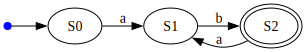

In [7]:
g, _ = dfa2dot(A)
g

In [8]:
r = dfa_2_regexp(A)
r

(((0, '+', ((0, '⋅', (('𝜀', '+', 0), '*')), '⋅', ('𝜀', '+', 0))),
  '+',
  ((('a', '+', ((0, '⋅', (('𝜀', '+', 0), '*')), '⋅', 'a')),
    '⋅',
    ((('𝜀', '+', 0), '+', (('b', '⋅', (('𝜀', '+', 0), '*')), '⋅', 'a')), '*')),
   '⋅',
   ('b', '+', (('b', '⋅', (('𝜀', '+', 0), '*')), '⋅', ('𝜀', '+', 0))))),
 '+',
 ((((('𝜀', '+', 0), '+', ((0, '⋅', (('𝜀', '+', 0), '*')), '⋅', 0)),
    '+',
    ((('a', '+', ((0, '⋅', (('𝜀', '+', 0), '*')), '⋅', 'a')),
      '⋅',
      ((('𝜀', '+', 0), '+', (('b', '⋅', (('𝜀', '+', 0), '*')), '⋅', 'a')),
       '*')),
     '⋅',
     (0, '+', (('b', '⋅', (('𝜀', '+', 0), '*')), '⋅', 0)))),
   '⋅',
   (((('𝜀', '+', 0), '+', ((0, '⋅', (('𝜀', '+', 0), '*')), '⋅', 0)),
     '+',
     ((('a', '+', ((0, '⋅', (('𝜀', '+', 0), '*')), '⋅', 'a')),
       '⋅',
       ((('𝜀', '+', 0), '+', (('b', '⋅', (('𝜀', '+', 0), '*')), '⋅', 'a')),
        '*')),
      '⋅',
      (0, '+', (('b', '⋅', (('𝜀', '+', 0), '*')), '⋅', 0)))),
    '*')),
  '⋅',
  ((0, '+', ((0, '⋅', (('𝜀', '+', 0),

As this regular expression is nearly unreadable,  The notebook `Rewrite.ipynb` contains the definition of the function `simplify` that can be used to simplify this expression.

In [9]:
%run Rewrite.ipynb

Version 1.0.6


In [10]:
%unload_ext nb_mypy

In [11]:
s = simplify(r)
s

(('a', '⋅', (('b', '⋅', 'a'), '*')), '⋅', 'b')

The function `regexp_2_string` takes a regular expression that is represented as a nested tuple and transforms it into a string.

In [12]:
def regexp_2_string(r):
    if r == 0: 
        return '0'
    if r == '𝜀': 
        return '𝜀'
    if isinstance(r, str): # single characters
        return r
    if r[1] == '⋅': # concatenation
        r1, _, r2 = r
        return regexp_2_string(r1) + '⋅' + regexp_2_string(r2)        
    if r[1] == '+':
        r1, _, r2 = r
        return '(' + regexp_2_string(r1) + '+' + regexp_2_string(r2) + ')'
    if r[1] == '*': 
        r0 = r[0]
        if isinstance(r0, str):
            return regexp_2_string(r0) +'*'
        else:
            return '(' + regexp_2_string(r0) + ')*'
    raise Exception(f'{r} is not a suitable regular expression')

In [13]:
print(regexp_2_string(s))

a⋅(b⋅a)*⋅b
